#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
unis = pd.read_csv('cleaned_university_data.csv')

In [3]:
unis.shape

(1302, 23)

In [4]:
unis.columns

Index(['college', 'state_code', 'state_name', 'region', 'division',
       'public_or_private', 'percentage_applications_received',
       'percentage_applications_accepted', 'number_new_students_enrolled',
       'percentage_new_students_from_top_10',
       'percentage_new_students_from_top_25', 'number_ft_undergrad',
       'number_pt_undergrad', 'in_state_tuition', 'out_of_state_tuition',
       'room', 'board', 'additional_fees', 'estimated_book_costs',
       'estimated_personal_spending', 'percentage_faculty_with_phd',
       'student_faculty_ratio', 'graduation_rate'],
      dtype='object')

*---------------------------------------------------------------------------------------------------------------------------------------------*

#### Check for possible missing values in the DataFrame

In [5]:
# unis.isnull().sum()[unis.isnull().sum() != 0].sort_values(ascending=False)

nan_party = pd.concat([unis.isnull().sum(), (unis.isnull().mean() * 100).round(2)], axis=1)
nan_party.columns = ['null_count', 'null_percentage']
nan_party[nan_party['null_count'] != 0]\
.sort_values(by='null_count', ascending=False).head(10)

,null_count,null_percentage
board,498,38.25
room,321,24.65
additional_fees,274,21.04
percentage_new_students_from_top_10,235,18.05
percentage_new_students_from_top_25,202,15.51
estimated_personal_spending,181,13.90
graduation_rate,98,7.53
estimated_book_costs,48,3.69
percentage_faculty_with_phd,32,2.46
number_pt_undergrad,32,2.46


In [6]:
# Ignore, Delete, Impute, Research

# Ignore: An option for now due to no current plans to model in sci-kit.

# Delete: No value in losing precious info row-wise. Likely to just ignore colum-wise.

# Impute: More trouble than worth
# Likely to introduce needless bias with this state-by-state/public vs. private data

# Research: Time-consuming; may not bear any fruit.


# Any compelling reason for an indicator column? 
# Any perceived pattern to any of the missingness?

In [7]:
#msno.matrix(unis)
#msno.bar(unis)

# Missing Number Heatmap:
# - A value near -1 means if one variable appears then the other variable is very 
# likely to be missing.
# - A value near 0 means there is no dependence between the occurrence of missing 
# values of two variables.
# - A value near 1 means if one variable appears then the other variable is very 
# likely to be present.

#msno.heatmap(unis);

*---------------------------------------------------------------------------------------------------------------------------------------------*

#### Explore Outliers and Distribution shapes

In [8]:
#unis.describe().round(2).T

unis.describe().round(2).T[["25%", '50%','75%', 'max']]

,25%,50%,75%,max
percentage_applications_received,695.75,1470.0,3314.25,48094.0
percentage_applications_accepted,554.50,1095.0,2303.00,26330.0
number_new_students_enrolled,236.00,447.0,984.00,7425.0
percentage_new_students_from_top_10,13.00,21.0,32.00,98.0
percentage_new_students_from_top_25,36.75,50.0,66.00,100.0
number_ft_undergrad,966.00,1812.0,4539.50,31643.0
number_pt_undergrad,131.25,472.0,1313.00,21836.0
in_state_tuition,2580.00,8050.0,11600.00,25750.0
out_of_state_tuition,6111.00,8670.0,11659.00,25750.0
room,1710.00,2200.0,3040.00,7400.0


In [9]:
dist_df = unis.select_dtypes(include=['number']).agg(['mean', 'median']).round(2).T
dist_df['mean_gt_median'] = dist_df['mean'] > dist_df['median']
dist_df

,mean,median,mean_gt_median
percentage_applications_received,2752.10,1470.0,True
percentage_applications_accepted,1870.68,1095.0,True
number_new_students_enrolled,778.88,447.0,True
percentage_new_students_from_top_10,25.67,21.0,True
percentage_new_students_from_top_25,52.35,50.0,True
number_ft_undergrad,3692.67,1812.0,True
number_pt_undergrad,1081.53,472.0,True
in_state_tuition,7897.27,8050.0,False
out_of_state_tuition,9276.91,8670.0,True
room,2514.68,2200.0,True


- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.

- Skewness can be positive or negative, or even undefined.

- If the mean is larger than the median, the data has a positive (right) skew.
- If the median is larger than the mean, the data has a negative (left) skew.

In [10]:
unis.select_dtypes(include=['number']).skew().round(2).sort_values(ascending=False)

additional_fees                        4.51
student_faculty_ratio                  4.19
number_pt_undergrad                    3.84
percentage_applications_received       3.66
percentage_applications_accepted       3.40
estimated_book_costs                   2.86
number_new_students_enrolled           2.67
number_ft_undergrad                    2.50
estimated_personal_spending            1.72
percentage_new_students_from_top_10    1.59
room                                   1.29
board                                  1.03
out_of_state_tuition                   0.73
in_state_tuition                       0.43
percentage_new_students_from_top_25    0.41
graduation_rate                        0.00
percentage_faculty_with_phd           -0.52
dtype: float64

One rule of thumb in regards to skewness (and there is some debate about this sort of thing in the data community)…

• If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

• If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed

• If the skewness is less than -1 or greater than 1, the data are highly skewed

That all said, some consider distributions between -1 and 1 to be moderately skewed, and anything beyond those ranges to be highly skewed.

In [11]:
len(unis.select_dtypes(include=['number']).columns)

17

In [12]:
# for column in unis.select_dtypes(include=['number']).columns:
#     unis.select_dtypes(include=['number'])[column].hist()
#     plt.title(column)
#     plt.tight_layout()
#     plt.show()

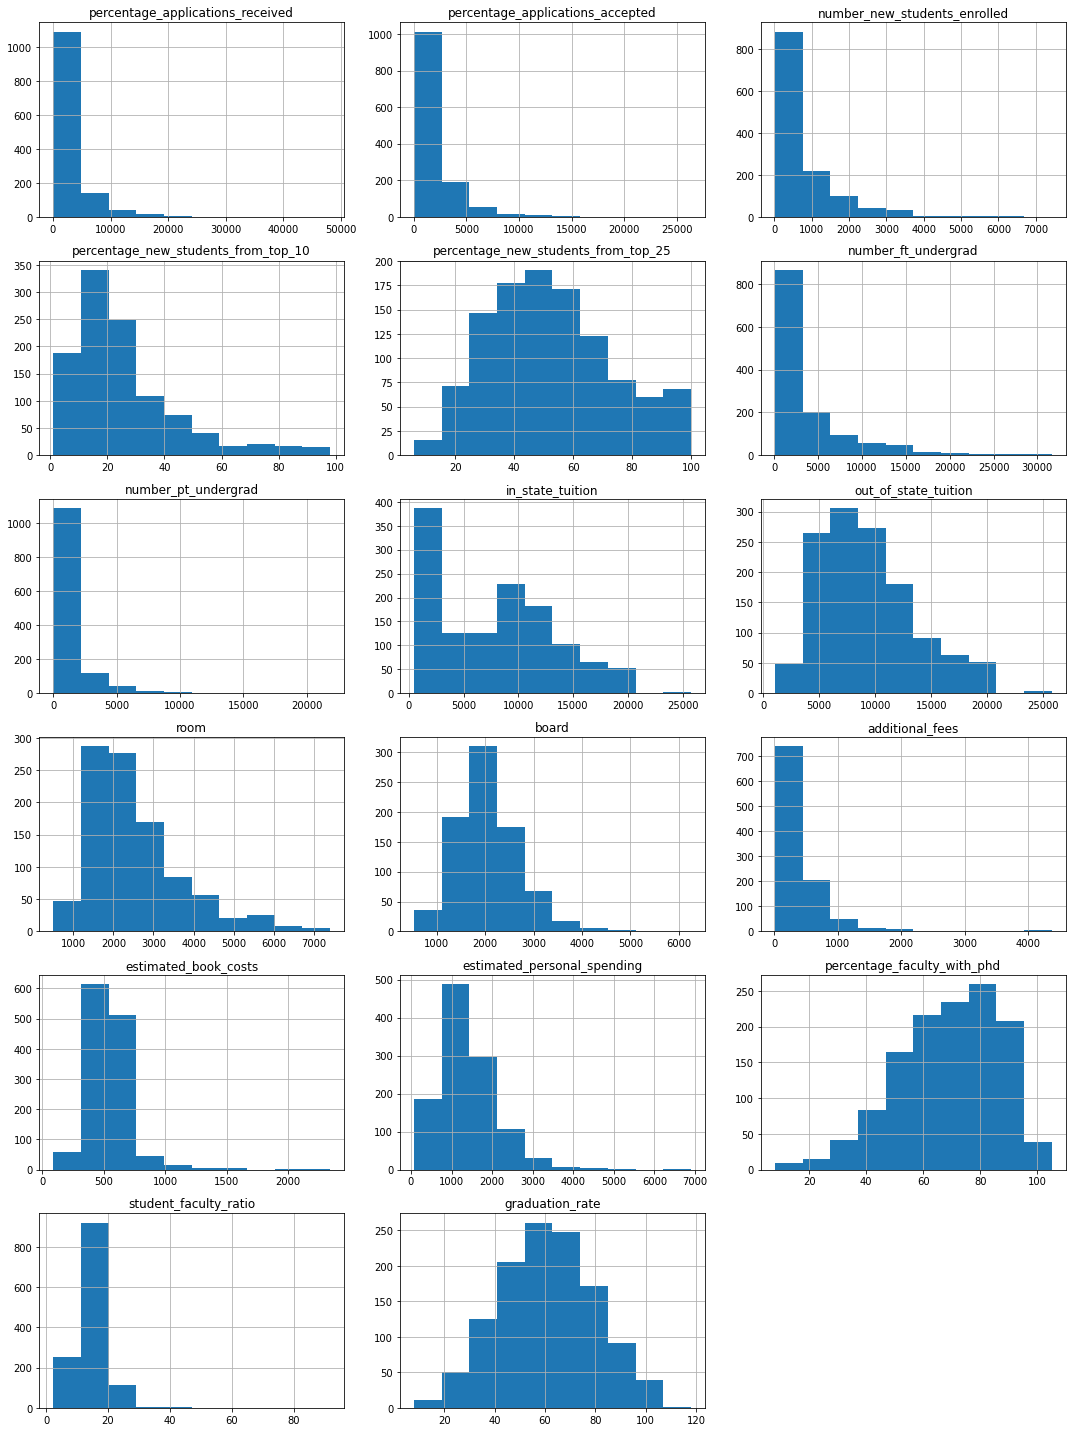

In [13]:
# Plot histograms in a grid layout with 6 rows and 3 columns
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
#print(axes)

# Flatten the axes array from 2D to 1D for easier iteration
axes = axes.flatten()
#print(axes)

# Iterate through columns and plot histograms
for i, column in enumerate(unis.select_dtypes(include=['number']).columns):
    unis[column].hist(ax=axes[i])
    axes[i].set_title(column)

# Hide remaining subplots since we'll produce 18 subplots here 
# but we only have 17 columns to plot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()

#### IQR 
The Interquartile Range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. 

Data points that fall below Q1 - 1.5 x IQR or above Q3 + 1.5 x IQR are typically considered outliers.

It's a fairly robust option for non-Gaussian distributions.

In [16]:
# Run once then comment out...

# def trim_outliers(df):
#     outlier_counts = pd.DataFrame(columns=['column_name', 'outlier_count'])
#     for column in df.select_dtypes(include=['number']).columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
#         df[column] = df[column].mask((df[column] < lower_bound) \
#                                      | (df[column] > upper_bound))
#         outlier_counts = pd.concat([outlier_counts, \
#                                     pd.DataFrame({'column_name': [column], 'outlier_count': 
#                                                   [len(outliers)]})], ignore_index=True)
#     return df, outlier_counts

# iqr_unis, outlier_counts = trim_outliers(unis)

In [17]:
outlier_counts.sort_values(by='outlier_count', ascending=False).head()

,column_name,outlier_count
5,number_ft_undergrad,124
0,percentage_applications_received,121
6,number_pt_undergrad,119
1,percentage_applications_accepted,105
2,number_new_students_enrolled,103


In [18]:
iqr_unis.select_dtypes(include=['number']).skew().round(2).sort_values(ascending=False)

number_ft_undergrad                    1.45
number_pt_undergrad                    1.42
percentage_applications_received       1.28
number_new_students_enrolled           1.24
percentage_applications_accepted       1.16
additional_fees                        1.03
percentage_new_students_from_top_10    0.82
room                                   0.73
out_of_state_tuition                   0.64
estimated_personal_spending            0.62
percentage_new_students_from_top_25    0.41
in_state_tuition                       0.40
board                                  0.33
student_faculty_ratio                  0.15
estimated_book_costs                   0.00
graduation_rate                       -0.01
percentage_faculty_with_phd           -0.39
dtype: float64

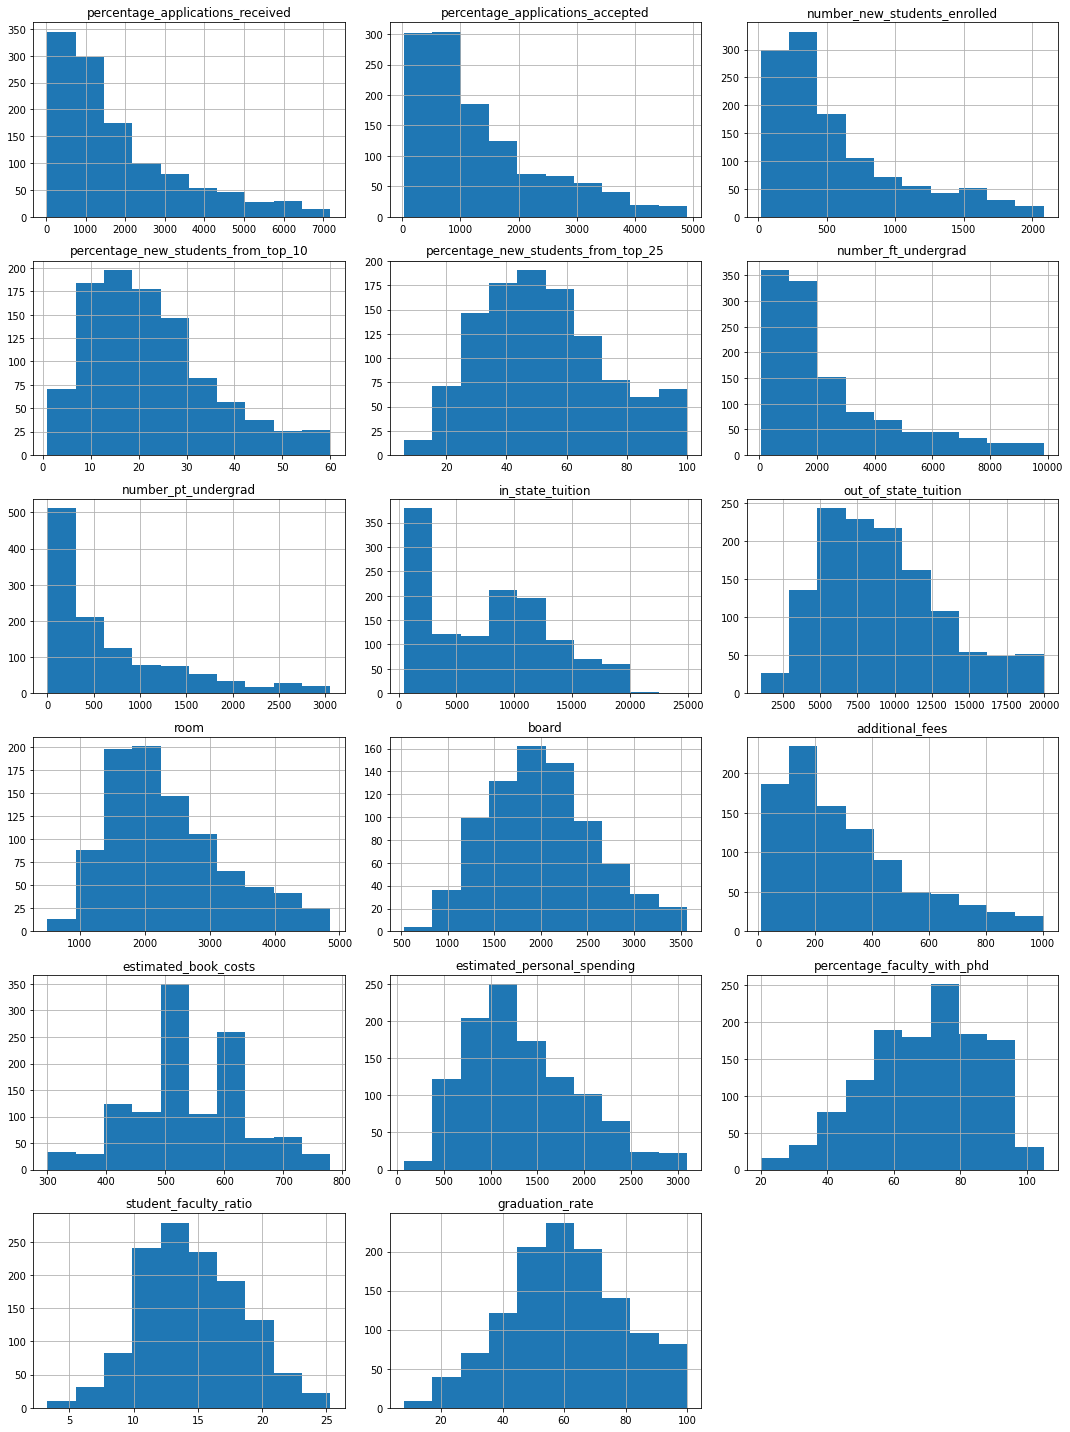

In [19]:
# Same as previously but not using the "trimmed" data...
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

axes = axes.flatten()

for i, column in enumerate(iqr_unis .select_dtypes(include=['number']).columns):
    iqr_unis[column].hist(ax=axes[i])
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()

*---------------------------------------------------------------------------------------------------------------------------------------------*